In [1]:
import os
import getpass
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Own Liberay
import xgboost_model as model

# XGBoost

## 1. Load data

In [4]:
# Gå et niveau op og naviger til mappen "Data"
os.chdir('../Data')

In [5]:
# Import features
file_path = 'Merged_dataset.csv'
df = pd.read_csv("merged_dataset.csv", sep=";", parse_dates=["Date"])
df.set_index("Date", inplace=True)
df.shape

(156, 184)

In [6]:
y = df.iloc[:, 0]   # første kolonne = inflation
X = df.iloc[:, 1:]  # resten = forklarende variable

# Tjek dimensioner
print("y shape:", y.shape)
print("X shape:", X.shape)

y shape: (156,)
X shape: (156, 183)


## 2. Imputer manglende værdier

In [8]:
imputer = SimpleImputer(strategy="median")  # Eller "median"

X_imputed = imputer.fit_transform(X)  # Imputer NaN i hele datasættet

# Konverter tilbage til DataFrame med kolonnenavne
X = pd.DataFrame(X_imputed, columns=X.columns, index = df.index)

## 3. Standardiser data 

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Forecast with rolling window

In [12]:
xgb_result = model.XGBoost_Forecaster_Rolling(
    X=X,
    y=y,
    forecast_horizon=12,
    last_observation_date="2024-12-01",
    scaler=scaler,
    window_length=108,
    verbose=True
)


=== Horisont h=1 ===
Antal træningsobservationer: 108
Antal features: 183

=== Horisont h=2 ===
Antal træningsobservationer: 107
Antal features: 183

=== Horisont h=3 ===
Antal træningsobservationer: 106
Antal features: 183

=== Horisont h=4 ===
Antal træningsobservationer: 105
Antal features: 183

=== Horisont h=5 ===
Antal træningsobservationer: 104
Antal features: 183

=== Horisont h=6 ===
Antal træningsobservationer: 103
Antal features: 183

=== Horisont h=7 ===
Antal træningsobservationer: 102
Antal features: 183

=== Horisont h=8 ===
Antal træningsobservationer: 101
Antal features: 183

=== Horisont h=9 ===
Antal træningsobservationer: 100
Antal features: 183

=== Horisont h=10 ===
Antal træningsobservationer: 99
Antal features: 183

=== Horisont h=11 ===
Antal træningsobservationer: 98
Antal features: 183

=== Horisont h=12 ===
Antal træningsobservationer: 97
Antal features: 183

Forudsagte måneder:
2025-01
2025-02
2025-03
2025-04
2025-05
2025-06
2025-07
2025-08
2025-09
2025-10

In [13]:
xgb_result

,Dato,Inflationsforecast,Horizon
0,2025-01-01,1.885115,0
1,2025-02-01,1.857592,1
2,2025-03-01,2.019759,2
3,2025-04-01,1.402784,3
4,2025-05-01,1.680331,4
5,2025-06-01,2.275895,5
6,2025-07-01,2.350799,6
7,2025-08-01,3.241156,7
8,2025-09-01,3.252422,8
9,2025-10-01,2.100575,9


# Rolling forecasts

In [15]:
forecast_results = model.run_rolling_forecast(X, y, forecast_horizon=12, start_date="2023-01-01", end_date="2024-12-01")


=== Forecast lavet i: 2023-01 ===

=== Forecast lavet i: 2023-02 ===

=== Forecast lavet i: 2023-03 ===

=== Forecast lavet i: 2023-04 ===

=== Forecast lavet i: 2023-05 ===

=== Forecast lavet i: 2023-06 ===

=== Forecast lavet i: 2023-07 ===

=== Forecast lavet i: 2023-08 ===

=== Forecast lavet i: 2023-09 ===

=== Forecast lavet i: 2023-10 ===

=== Forecast lavet i: 2023-11 ===

=== Forecast lavet i: 2023-12 ===

=== Forecast lavet i: 2024-01 ===

=== Forecast lavet i: 2024-02 ===

=== Forecast lavet i: 2024-03 ===

=== Forecast lavet i: 2024-04 ===

=== Forecast lavet i: 2024-05 ===

=== Forecast lavet i: 2024-06 ===

=== Forecast lavet i: 2024-07 ===

=== Forecast lavet i: 2024-08 ===

=== Forecast lavet i: 2024-09 ===

=== Forecast lavet i: 2024-10 ===

=== Forecast lavet i: 2024-11 ===

=== Forecast lavet i: 2024-12 ===


In [16]:
forecast_results

,Dato,Inflationsforecast,Horizon,Forecast_made_in
0,2023-02-01,7.678067,0,2023-01-01
1,2023-03-01,7.127307,1,2023-01-01
2,2023-04-01,7.969609,2,2023-01-01
3,2023-05-01,7.660932,3,2023-01-01
4,2023-06-01,7.916095,4,2023-01-01
...,...,...,...,...
283,2025-08-01,3.390045,7,2024-12-01
284,2025-09-01,2.071708,8,2024-12-01
285,2025-10-01,3.100240,9,2024-12-01
286,2025-11-01,2.593162,10,2024-12-01


In [17]:
eval_df, merged_df = model.evaluate_forecasts(forecast_results, y)
eval_df

,Horizon,MAE,RMSE,N_obs
0,0,0.618643,0.840424,23
1,1,1.045290,1.439590,22
2,2,1.753060,2.225840,21
3,3,2.070865,2.438161,20
4,4,2.311283,2.824701,19
5,5,2.523001,3.315439,18
6,6,2.596755,3.573966,17
7,7,3.828787,4.549808,16
8,8,4.495983,5.011627,15
9,9,3.977603,4.823481,14


In [18]:
h1 = merged_df[merged_df["Horizon"] == 0]
h1

,Dato,Inflationsforecast,Horizon,Forecast_made_in,y_true,error,abs_error,squared_error
0,2023-02-01,7.678067,0,2023-01-01,7.601,0.077067,0.077067,0.005939
12,2023-03-01,7.601759,0,2023-02-01,6.733,0.868759,0.868759,0.754743
24,2023-04-01,6.733377,0,2023-03-01,5.282,1.451377,1.451377,2.106495
36,2023-05-01,5.282141,0,2023-04-01,2.928,2.354141,2.354141,5.541979
48,2023-06-01,2.928052,0,2023-05-01,2.465,0.463052,0.463052,0.214417
60,2023-07-01,2.465119,0,2023-06-01,3.133,-0.667881,0.667881,0.446066
72,2023-08-01,3.133282,0,2023-07-01,2.437,0.696282,0.696282,0.484809
84,2023-09-01,2.437248,0,2023-08-01,0.859,1.578248,1.578248,2.490865
96,2023-10-01,0.859088,0,2023-09-01,0.085,0.774088,0.774088,0.599212
108,2023-11-01,0.084823,0,2023-10-01,0.600,-0.515177,0.515177,0.265408


In [19]:
sum_23 = h1["Inflationsforecast"].iloc[0:11].sum() / 12
sum_t23 = h1["y_true"].iloc[0:11].sum() / 12
print(sum_23)
print(sum_t23)

3.316859245300293
2.7344166666666667


In [20]:
sum_r = h1["Inflationsforecast"].iloc[11:24].sum() / 12
sum_t = h1["y_true"].iloc[11:24].sum() / 12
print(sum_r)
print(sum_t)

1.274131139119466
1.3736666666666668


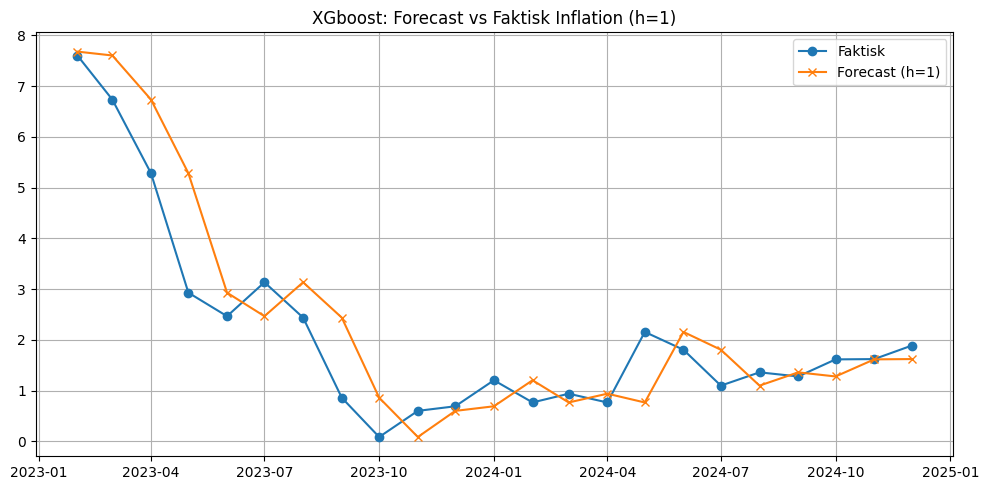

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(h1["Dato"], h1["y_true"], label="Faktisk", marker="o")
plt.plot(h1["Dato"], h1["Inflationsforecast"], label="Forecast (h=1)", marker="x")
plt.legend()
plt.title("XGboost: Forecast vs Faktisk Inflation (h=1)")
plt.grid(True)
plt.tight_layout()
plt.show()

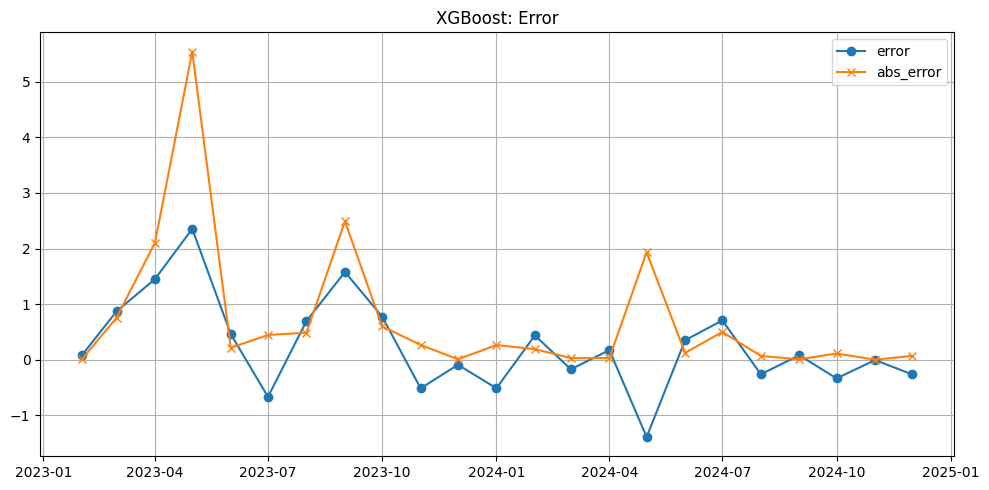

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(h1["Dato"], h1["error"], label="error", marker="o")
plt.plot(h1["Dato"], h1["squared_error"], label="abs_error", marker="x")
plt.legend()
plt.title("XGBoost: Error")
plt.grid(True)
plt.tight_layout()
plt.show()